# Identify consolidations

In [1]:
import numpy as np
import pandas as pd

import bt
import talib
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

# import seaborn as sns
# sns.set_style('darkgrid')



### Hyperparameter

In [2]:
# stocks = bt.get("AAPL, AMZN, META, GOOG, NFLX, INTC, BA", start="2011-01-01", end="2024-12-31")
min_max_window = 14
regress_window = 120


In [3]:
# aapl = stocks["aapl"].to_frame(name="Close")
# aapl.info()

# intc = stocks["intc"].to_frame(name="Close")

intc = yf.download("INTC", start="2011-01-01", end="2024-12-31")
crude_oil="CL=F"
intc.columns = ["Close", "High", "Low", "Open", "Volume"]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


## Charting prices of Intel

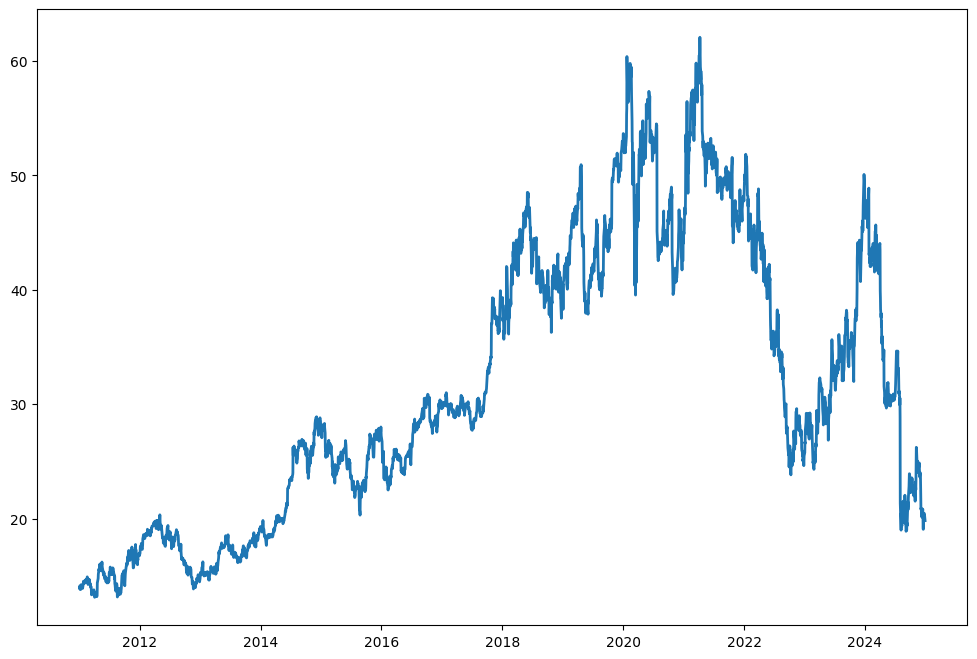

In [4]:
plt.figure(figsize=(12, 8))
plt.plot(intc["Close"], label="Close", linewidth= 2, color="C0")
plt.show()

In [5]:
intc["Max"] = intc["Close"].rolling(window=min_max_window).max()
intc["Min"] = intc["Close"].rolling(window=min_max_window).min()
intc["Max20"] = intc["Close"].rolling(window=20).max()
intc["Min20"] = intc["Close"].rolling(window=20).min()

intc["Adx"] = talib.ADX(intc["High"], intc["Low"], intc["Close"], timeperiod=14)


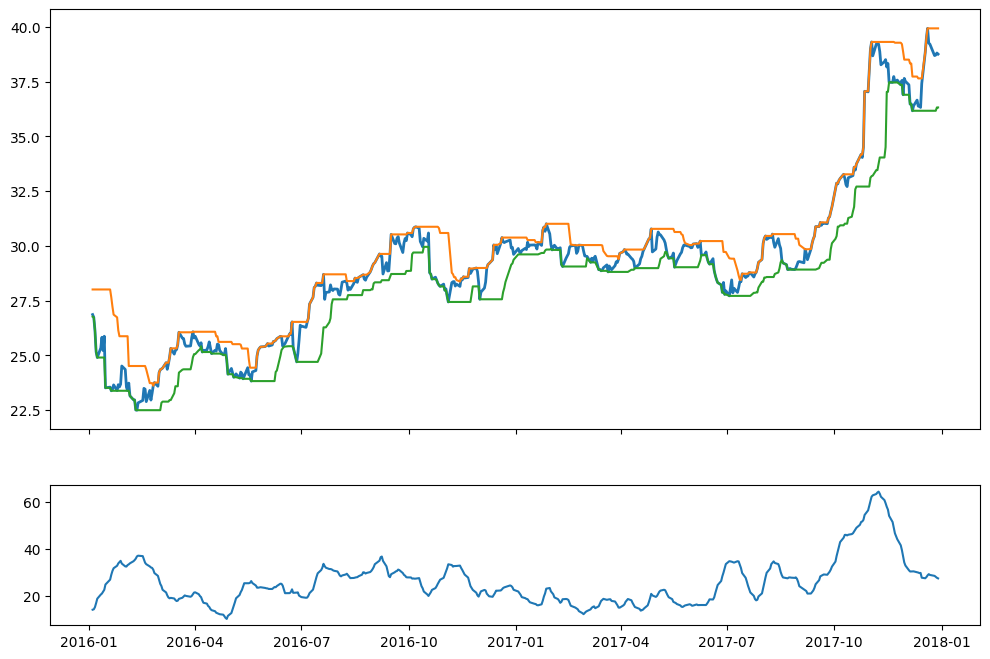

In [6]:
intc201617 = intc.loc["2016":"2017"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), height_ratios=(3, 1), sharex=True)

ax1.plot(intc201617["Close"], label="Close", linewidth= 2, color="C0")
ax1.plot(intc201617["Max"], label="Max", color="C1")
ax1.plot(intc201617["Min"], label="Min", color="C2")

ax2.plot(intc201617["Adx"], label="ADX", color="C0")


From 2017-01 to 2017-07, there seems to be a consolidation pattern with low adx, let's see if the algorithm can identify it with upper and lower bond. 


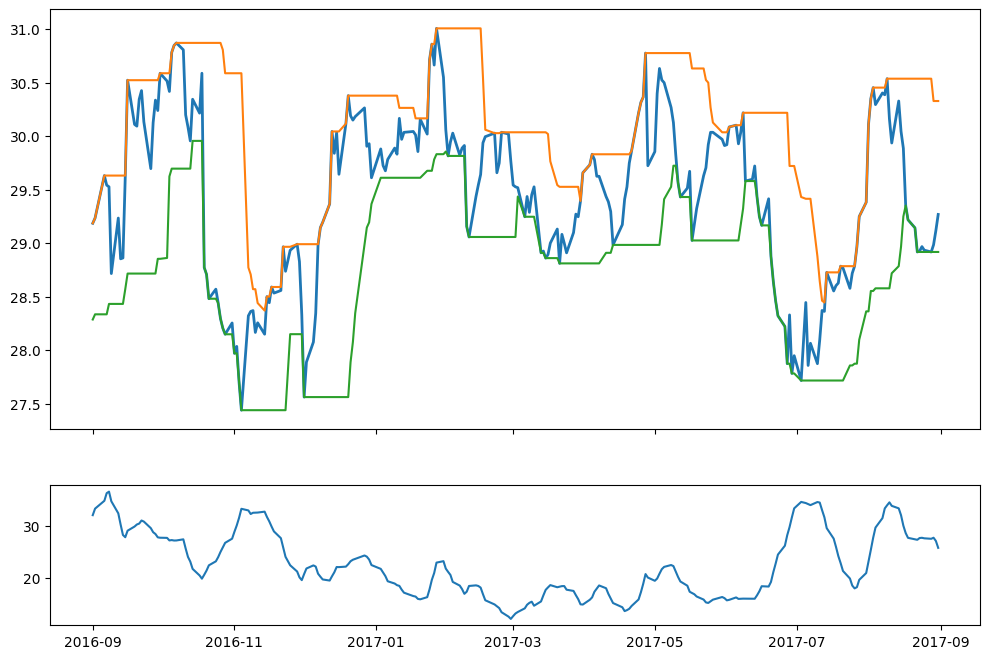

In [7]:
intc2016 = intc.loc["2016-09":"2017-08"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), height_ratios=(3, 1), sharex=True)

ax1.plot(intc2016["Close"], label="Close", linewidth= 2, color="C0")
ax1.plot(intc2016["Max"], label="Max", color="C1")
ax1.plot(intc2016["Min"], label="Min", color="C2")

ax2.plot(intc2016["Adx"], label="ADX", color="C0")


## Run linear regression on consolidation period

In [8]:
def regress_boundary(data):
    x = np.arange(0, data.shape[0])
    x = x.reshape(-1, 1)
    y = data
    model = LinearRegression()

    model.fit(x, y)
    predictions = model.predict(x)
    return predictions

In [9]:
upper = regress_boundary(intc2016["Max"])
lower = regress_boundary(intc2016["Min"])


Text(0.5, 1.0, 'ADX')

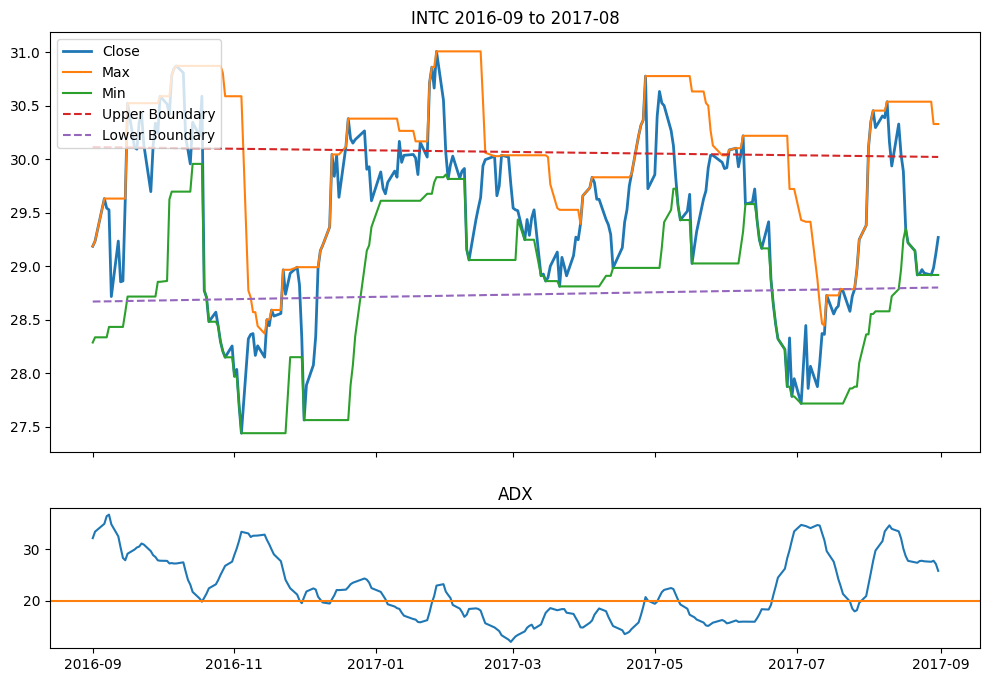

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), height_ratios=(3, 1), sharex=True)

ax1.plot(intc2016.index, intc2016["Close"], label="Close", linewidth= 2, color="C0")
ax1.plot(intc2016.index, intc2016["Max"], label="Max", color="C1")
ax1.plot(intc2016.index, intc2016["Min"], label="Min", color="C2")
ax1.plot(intc2016.index, upper, label="Upper Boundary", color="C3", linestyle="--")
ax1.plot(intc2016.index, lower, label="Lower Boundary", color="C4", linestyle="--")
ax1.set_title("INTC 2016-09 to 2017-08")
ax1.legend(loc="upper left")

ax2.plot(intc2016["Adx"], label="ADX", color="C0")
ax2.axhline(y=20, color="C1")
ax2.set_title("ADX")

In [11]:
intc2016.shape[0]

252

the regression line is draw on a 250 day period. with Max() on a 20 day window, the upper and lower boundary are closer to the edges compared to the Max() on a 14 day window. 

Text(0.5, 1.0, 'ADX')

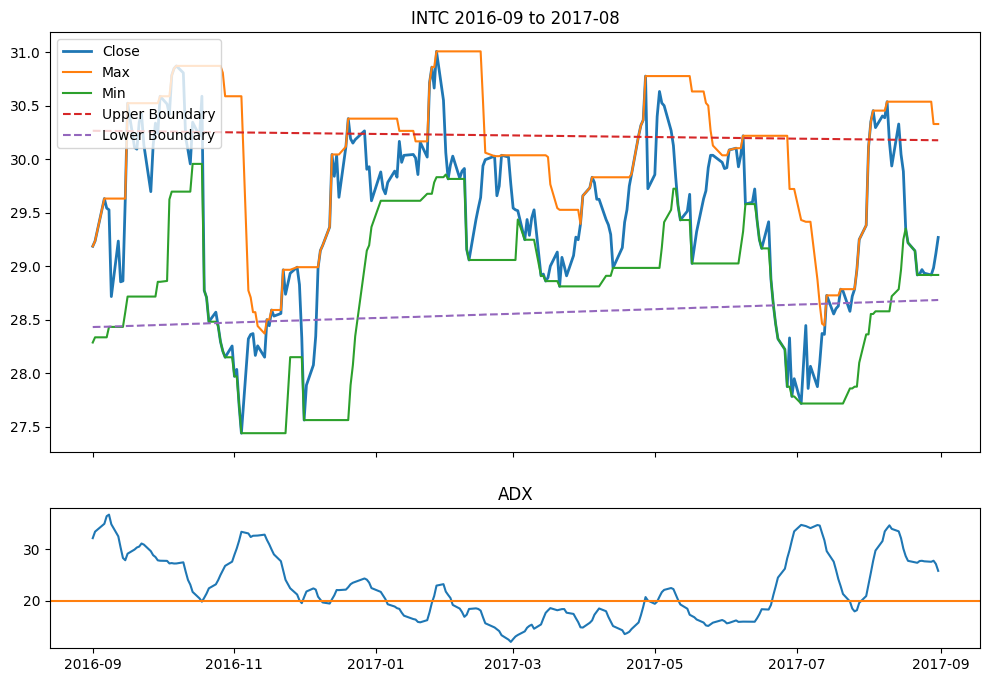

In [18]:
upper2 = regress_boundary(intc2016["Max20"])
lower2 = regress_boundary(intc2016["Min20"])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), height_ratios=(3, 1), sharex=True)

ax1.plot(intc2016.index, intc2016["Close"], label="Close", linewidth= 2, color="C0")
ax1.plot(intc2016.index, intc2016["Max"], label="Max", color="C1")
ax1.plot(intc2016.index, intc2016["Min"], label="Min", color="C2")
ax1.plot(intc2016.index, upper2, label="Upper Boundary", color="C3", linestyle="--")
ax1.plot(intc2016.index, lower2, label="Lower Boundary", color="C4", linestyle="--")
ax1.set_title("INTC 2016-09 to 2017-08")
ax1.legend(loc="upper left")

ax2.plot(intc2016["Adx"], label="ADX", color="C0")
ax2.axhline(y=20, color="C1")
ax2.set_title("ADX")

## Run linear regression on trending period

In [13]:
intc2016_s2 = intc.loc["2016-04":"2016-11"]

upper = regress_boundary(intc2016_s2["Max"])
lower = regress_boundary(intc2016_s2["Min"])

Text(0.5, 1.0, 'ADX')

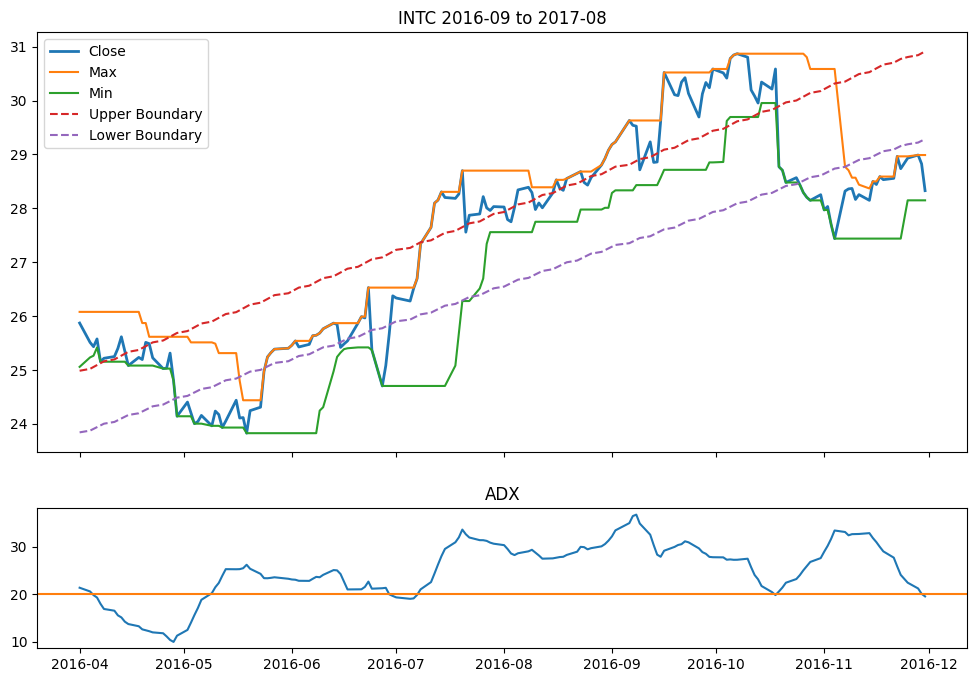

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), height_ratios=(3, 1), sharex=True)

ax1.plot(intc2016_s2.index, intc2016_s2["Close"], label="Close", linewidth= 2, color="C0")
ax1.plot(intc2016_s2.index, intc2016_s2["Max"], label="Max", color="C1")
ax1.plot(intc2016_s2.index, intc2016_s2["Min"], label="Min", color="C2")
ax1.plot(intc2016_s2.index, upper, label="Upper Boundary", color="C3", linestyle="--")
ax1.plot(intc2016_s2.index, lower, label="Lower Boundary", color="C4", linestyle="--")
ax1.set_title("INTC 2016-09 to 2017-08")
ax1.legend(loc="upper left")

ax2.plot(intc2016_s2["Adx"], label="ADX", color="C0")
ax2.axhline(y=20, color="C1")
ax2.set_title("ADX")

In [15]:
intc2016

,Close,High,Low,Open,Volume,Max,Min,Max20,Min20,Adx
Date,,,,,,,,,,
2016-09-01,29.185297,29.201502,28.828787,29.160990,18925800,29.185297,28.285919,29.185297,27.978022,32.131575
2016-09-02,29.233917,29.436480,29.128584,29.339248,16726700,29.233917,28.334536,29.233917,27.978022,33.396281
2016-09-06,29.630936,29.655242,29.306833,29.476989,22337800,29.630936,28.334536,29.630936,27.978022,34.919790
2016-09-07,29.541807,29.695757,29.476989,29.695757,18495600,29.630936,28.334536,29.630936,27.978022,36.396128
2016-09-08,29.525602,29.647141,29.266322,29.452679,20356500,29.630936,28.431755,29.630936,28.010429,36.695049
...,...,...,...,...,...,...,...,...,...,...
2017-08-25,28.933863,29.150848,28.858756,29.059047,14726800,30.536201,28.917166,30.536201,28.917166,27.643460
2017-08-28,28.917166,29.042346,28.867092,29.025655,20712900,30.536201,28.917166,30.536201,28.917166,27.551357
2017-08-29,28.983931,29.000622,28.758602,28.800329,15843700,30.327560,28.917166,30.536201,28.917166,27.754282


### Regress on upper and lower bound continously, on a 14 day window

In [ ]:

def get_boundary_point_estimate(data):
    predictions = regress_boundary(data)
    # i = int(-(regress_window/2))
    i = -1
    return predictions[i]


intc["Upper"] = intc["Max"].rolling(window=regress_window).apply(get_boundary_point_estimate)
intc["Lower"] = intc["Min"].rolling(window=regress_window).apply(get_boundary_point_estimate)


Text(0.5, 1.0, 'ADX')

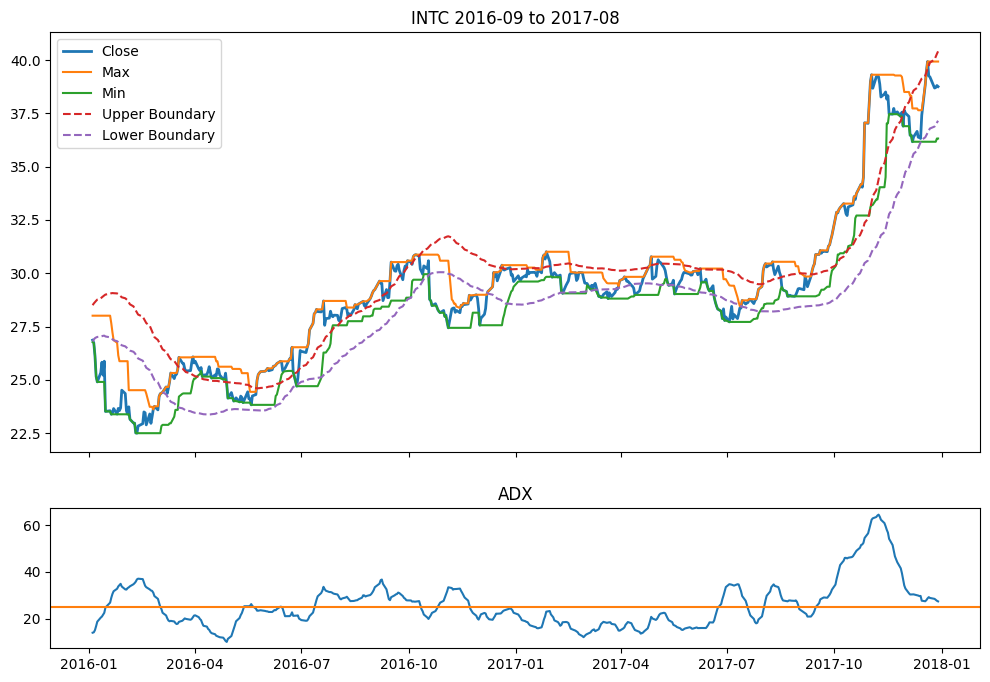

In [17]:
intc2016b = intc.loc["2016":"2017"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), height_ratios=(3, 1), sharex=True)

ax1.plot(intc2016b.index, intc2016b["Close"], label="Close", linewidth= 2, color="C0")
ax1.plot(intc2016b.index, intc2016b["Max"], label="Max", color="C1")
ax1.plot(intc2016b.index, intc2016b["Min"], label="Min", color="C2")
ax1.plot(intc2016b.index, intc2016b["Upper"], label="Upper Boundary", color="C3", linestyle="--")
ax1.plot(intc2016b.index, intc2016b["Lower"], label="Lower Boundary", color="C4", linestyle="--")
ax1.set_title("INTC 2016-09 to 2017-08")
ax1.legend(loc="upper left")

ax2.plot(intc2016b["Adx"], label="ADX", color="C0")
ax2.axhline(y=25, color="C1")
ax2.set_title("ADX")

## Findings on the regression channel

We can see that the boundary somewhat captures the price channel. We can see that: 

1. between 2016-07 and 2016-10, the price is on on uptrend. It can be distinguished by the positive slope of the regression channel and ADX > 30. 
2. between 2017-01 and 2017-07, the price is trendless/consolidating. It can be distinguished by the close to zero slope of the regression channel and ADX < 30. 
3. There is a false breakout (downward price movement) in 2017, followed by a upward breakout around 2017-09

In [25]:
def get_model_parameters(data): 
    x = np.arange(0, data.shape[0])
    x = x.reshape(-1, 1)
    y = data

    model = LinearRegression()
    model.fit(x, y)

    return model.coef_[0]

intc["UpperSlope"] = intc["Upper"].rolling(window=regress_window).apply(get_model_parameters)
intc["LowerSlope"] = intc["Lower"].rolling(window=regress_window).apply(get_model_parameters)

intc.tail()

,Close,High,Low,Open,Volume,Max,Min,Max20,Min20,Adx,Upper,Lower,UpperSlope,LowerSlope
Date,,,,,,,,,,,,,,
2024-12-23,20.200001,20.230000,19.520000,19.580000,57988400,21.959999,19.059999,24.870001,19.059999,16.764969,21.560022,19.129229,-0.083515,-0.080909
2024-12-24,20.400000,20.400000,19.959999,20.219999,29884000,20.920000,19.059999,24.049999,19.059999,16.662660,21.466145,19.160578,-0.082931,-0.078887
2024-12-26,20.440001,20.670000,20.080000,20.230000,39846200,20.920000,19.059999,24.049999,19.059999,16.194119,21.409398,19.198046,-0.082340,-0.076812
2024-12-27,20.299999,20.610001,20.090000,20.209999,48260800,20.830000,19.059999,24.049999,19.059999,15.759046,21.364937,19.240177,-0.081727,-0.074681
2024-12-30,19.820000,20.110001,19.730000,20.010000,59608100,20.830000,19.059999,23.930000,19.059999,15.775781,21.330709,19.286972,-0.081081,-0.072495


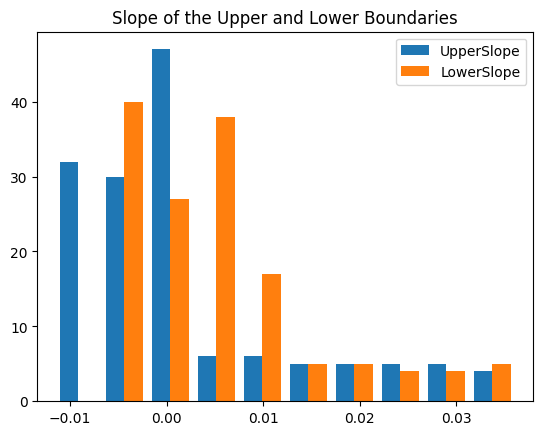

In [37]:
plt.hist(intc.loc["2017-01":"2017-07", ["UpperSlope", "LowerSlope"]], bins=10)
plt.legend(["UpperSlope", "LowerSlope"])
plt.title("Slope of the Upper and Lower Boundaries")
plt.show()

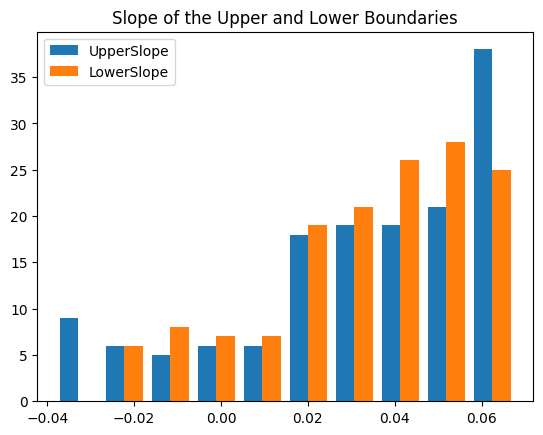

In [38]:
plt.hist(intc.loc["2016-07":"2017-01", ["UpperSlope", "LowerSlope"]], bins=10)
plt.legend(["UpperSlope", "LowerSlope"])
plt.title("Slope of the Upper and Lower Boundaries")
plt.show()

As we can see, in the trending period, the slope is between 0.04 and 0.06. In consolidation period, slope is around -0.01 and 0.01. Let's use this as a criteria to identify consolidation period. 

### Generate trending range signal

The SignalAlgo does the following: 
1. taking 14 day max and min. 
2. run linear regression on a 120 day window. 
3. if 80% of slope is within [-0.01, 0.01], a tranding range is established. 
4. when prices closes above or below the tranding range for 2%, a breakout occurs, go long/short. 
5. stop loss is 10% retracement. 
   

In [64]:
def check_slope(slope):
    p10, p90 = np.percentile(slope, [10, 90])

    return True if (p10 > -0.02 and p90 < 0.02) else False


intc["upper_slope_flat"] = intc["UpperSlope"].rolling(window=regress_window).apply(check_slope)
intc["upper_slope_flat"] = intc["upper_slope_flat"].map(lambda x: True if x else False)

intc["lower_slope_flat"] = intc["LowerSlope"].rolling(window=regress_window).apply(check_slope)
intc["lower_slope_flat"] = intc["lower_slope_flat"].map(lambda x: True if x else False)

intc["in_trading_range"] = intc["upper_slope_flat"] & intc["lower_slope_flat"]

intc


,Close,High,Low,Open,Volume,Max,Min,Max20,Min20,Adx,Upper,Lower,UpperSlope,LowerSlope,in_trading_range,upper_slope_flat,lower_slope_flat
Date,,,,,,,,,,,,,,,,,
2011-01-03,13.916612,14.050104,13.869889,14.023406,58223800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True
2011-01-04,14.116846,14.150220,14.050100,14.096823,75206200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True
2011-01-05,13.976687,14.156902,13.949988,14.143553,61810500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True
2011-01-06,13.863215,13.896588,13.716373,13.796469,116669000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True
2011-01-07,13.789793,13.863214,13.529483,13.823166,74806100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,20.200001,20.230000,19.520000,19.580000,57988400,21.959999,19.059999,24.870001,19.059999,16.764969,21.560022,19.129229,-0.083515,-0.080909,False,False,False
2024-12-24,20.400000,20.400000,19.959999,20.219999,29884000,20.920000,19.059999,24.049999,19.059999,16.662660,21.466145,19.160578,-0.082931,-0.078887,False,False,False
2024-12-26,20.440001,20.670000,20.080000,20.230000,39846200,20.920000,19.059999,24.049999,19.059999,16.194119,21.409398,19.198046,-0.082340,-0.076812,False,False,False


Text(0.5, 1.0, 'Is in trading range')

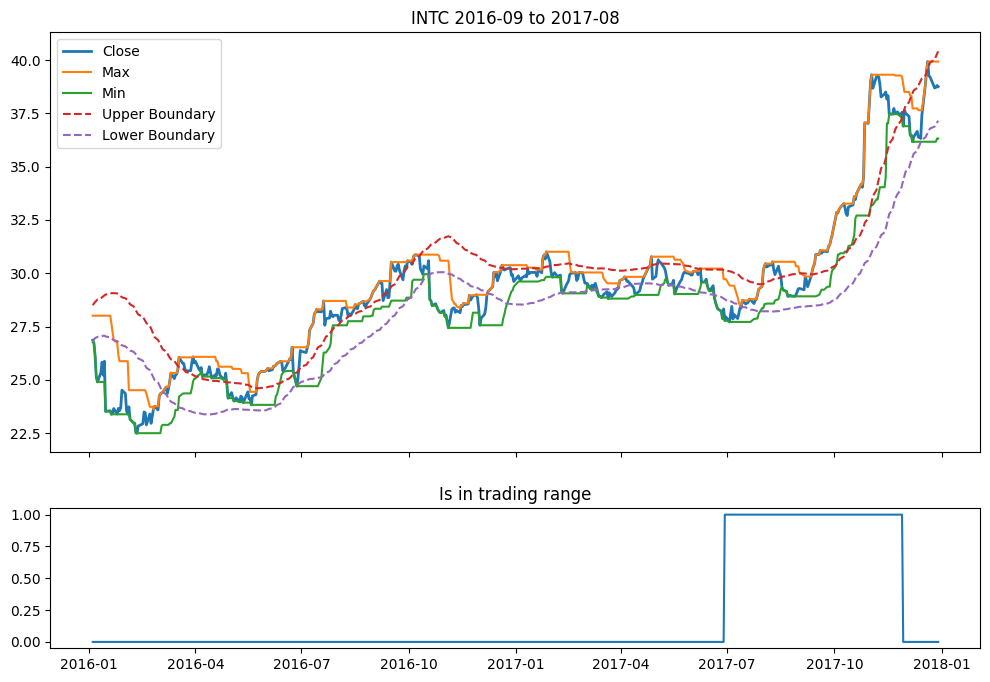

In [65]:
intc2016b = intc.loc["2016":"2017"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), height_ratios=(3, 1), sharex=True)

ax1.plot(intc2016b.index, intc2016b["Close"], label="Close", linewidth= 2, color="C0")
ax1.plot(intc2016b.index, intc2016b["Max"], label="Max", color="C1")
ax1.plot(intc2016b.index, intc2016b["Min"], label="Min", color="C2")
ax1.plot(intc2016b.index, intc2016b["Upper"], label="Upper Boundary", color="C3", linestyle="--")
ax1.plot(intc2016b.index, intc2016b["Lower"], label="Lower Boundary", color="C4", linestyle="--")
ax1.set_title("INTC 2016-09 to 2017-08")
ax1.legend(loc="upper left")

ax2.plot(intc2016b["in_trading_range"], label="in_trading_range", color="C0")
ax2.set_title("Is in trading range")